# Auswertung Validierung mit Clusterbeispielen
- Hoher Anteil an problematischen Beispielen!
- ICP to point src=tem scheint beste ICP-Variante zu sein 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
filename = "clusterbeispielvalidierungNEU.csv"

filename = os.path.join("validierung", filename)
df = pd.read_csv(filename, index_col=False)
df["direction"].fillna("none", inplace=True)
df["how_dir"] = df["how"]  + " " + df["direction"]
df["template str"] = df["template"].astype(str)
df["rmse_all"] = df["rmse_all"].replace(0, np.nan)
df.head()

/tmp/ipykernel_1528291/3518139627.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["direction"].fillna("none", inplace=True)


,file,template,cluster_id,how,direction,shift_z,total,inliers,inlier_ratio,rmse_inliers,...,max_corr,icp_rmse,icp_fitness,side_a,side_b,not_same_side,time,distance,how_dir,template str
0,PunkteSeiteVieleAusreisser,NaN,0,My,none,0.0,475,457.0,0.962105,0.003957,...,0.157073,NaN,NaN,-0.823834,-0.683616,0.0,0.004009,NaN,My none,nan
1,PunkteSeiteVieleAusreisser,0.0,0,ICP to_point,src=tem,0.0,478,450.0,0.941423,0.005582,...,0.091148,0.013179,0.498224,NaN,NaN,NaN,0.408477,0.005175,ICP to_point src=tem,0.0
2,PunkteSeiteVieleAusreisser,0.0,0,ICP to_plane,src=tem,0.0,475,458.0,0.964211,0.005308,...,0.191585,0.012965,0.475461,NaN,NaN,NaN,0.981731,0.048625,ICP to_plane src=tem,0.0
3,PunkteSeiteVieleAusreisser,0.0,0,ICP to_point,src=pcl,0.0,483,468.0,0.968944,0.003661,...,0.155914,0.005090,0.530761,NaN,NaN,NaN,0.035921,NaN,ICP to_point src=pcl,0.0
4,PunkteSeiteVieleAusreisser,0.0,0,ICP to_plane,src=pcl,0.0,476,461.0,0.968487,0.003650,...,0.157161,0.005186,0.528676,NaN,NaN,NaN,0.048294,NaN,ICP to_plane src=pcl,0.0


In [3]:
df.columns

Index(['file', 'template', 'cluster_id', 'how', 'direction', 'shift_z',
       'total', 'inliers', 'inlier_ratio', 'rmse_inliers', 'rmse_all',
       'max_z_diff', 'corr_xy', 'corr_xy_upper', 'corr_yz', 'max_corr',
       'icp_rmse', 'icp_fitness', 'side_a', 'side_b', 'not_same_side', 'time',
       'distance', 'how_dir', 'template str'],
      dtype='object')

In [4]:
df["file"].unique()

array(['PunkteSeiteVieleAusreisser', 'ObenundSeite', 'ObenNull1',
       'PunkteSeite', 'VieleLückeMitte', 'VieleGleiseEherTop',
       'VieleSchürhaken', 'VieleZ', 'Achszaehler1', 'Achszaehler2',
       'Achszaehler3', 'Auch links rechts falsch', 'PunkteOben',
       'ObenNull', 'ObenNull2', 'ObenNull3', 'Abseits1',
       'Abseits14Punkte', 'AbseitsAusreisser', 'VSeite1', 'VSeite2',
       'VSeite3', 'VSeite4', 'VSeite5'], dtype=object)

In [5]:
df["filetype"] = df["file"]
df["filetype"] = df["filetype"].replace(regex="\d",  value="")
df["filetype"] = df["filetype"].replace("PunkteSeiteVieleAusreisser", "Seite")
df["filetype"] = df["filetype"].replace("ObenundSeite", "Oben")
df["filetype"] = df["filetype"].replace("ObenNull", "Oben")
df["filetype"] = df["filetype"].replace("PunkteOben", "Oben")
df["filetype"] = df["filetype"].replace("VieleGleiseEherTop", "Oben")
df["filetype"] = df["filetype"].replace("VieleSchürhaken", "Seite")
df["filetype"] = df["filetype"].replace("Auch links rechts falsch", "Seite")
df["filetype"] = df["filetype"].replace("PunkteSeite", "Seite")
df["filetype"] = df["filetype"].replace("VieleLückeMitte", "Abseits")
df["filetype"] = df["filetype"].replace("VieleZ", "Abseits")
df["filetype"] = df["filetype"].replace("VSeite", "Seite")
df["filetype"] = df["filetype"].replace(regex="Abseits.*", value="Abseits")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   file           600 non-null    object 
 1   template       576 non-null    float64
 2   cluster_id     600 non-null    int64  
 3   how            600 non-null    object 
 4   direction      600 non-null    object 
 5   shift_z        600 non-null    float64
 6   total          600 non-null    int64  
 7   inliers        600 non-null    float64
 8   inlier_ratio   600 non-null    float64
 9   rmse_inliers   596 non-null    float64
 10  rmse_all       517 non-null    float64
 11  max_z_diff     600 non-null    float64
 12  corr_xy        600 non-null    float64
 13  corr_xy_upper  600 non-null    float64
 14  corr_yz        600 non-null    float64
 15  max_corr       600 non-null    float64
 16  icp_rmse       576 non-null    float64
 17  icp_fitness    576 non-null    float64
 18  side_a    

## Totalversagen bei ICP
- bei "src=pcl" (im ipynb Version "Vertauscht") extrem häufig Totalversagen (0 Inlier)
- insbes. bei Punkten nur auf Seite, aber auch in allen anderen Fällen
- sowohl bei shift_z 0 als auch 0.03

In [7]:
df[df["inliers"] == 0].groupby("how_dir").count()["file"] # Use any column to count

how_dir
ICP to_plane src=pcl    57
ICP to_plane src=tem     6
ICP to_point src=pcl    24
Name: file, dtype: int64

In Prozent

In [8]:
(df[df["inliers"] == 0].groupby("how_dir").count()["file"]  * 100 / df.groupby("how_dir").count()["file"]).dropna() 

how_dir
ICP to_plane src=pcl    39.583333
ICP to_plane src=tem     4.166667
ICP to_point src=pcl    16.666667
Name: file, dtype: float64

In [9]:
# df[df["inliers"] == 0].groupby(["how_dir", "filetype", "shift_z"]).count()["file"] 
df[df["inliers"] == 0].groupby(["how_dir", "filetype"]).count()["file"] 

how_dir               filetype   
ICP to_plane src=pcl  Abseits        28
                      Achszaehler     4
                      Oben           18
                      Seite           7
ICP to_plane src=tem  Abseits         6
ICP to_point src=pcl  Abseits        12
                      Oben            6
                      Seite           6
Name: file, dtype: int64

In [10]:
df[df["inliers"] == 0].groupby("template").count()["file"] # Use any column to count

template
0.0    29
1.0    32
2.0    26
Name: file, dtype: int64

In [11]:
df[df["inliers"] == 0].groupby("shift_z").count()["file"] # Use any column to count

shift_z
0.00    40
0.03    47
Name: file, dtype: int64

In [12]:
(df[df["inliers"] == 0].groupby("filetype").count()["file"] * 100 / df.groupby("filetype").count()["file"]).dropna() 

filetype
Abseits        36.800000
Achszaehler     5.333333
Oben           13.714286
Seite           5.777778
Name: file, dtype: float64

## Fail
Eindeutig fail wenn
- kleine inlier ratio
- max z Differenz zu groß
- Korrelation nicht aussagekräftig, s. 40_timecorr.ipynb
    - Was hier nicht fail ist, kann trotzdem zu schief sein, aber die Korrelation ist dafür leider nicht aussagekräftig

In [13]:
df["fail"] = (df["inlier_ratio"] < 0.6) | (df["max_z_diff"] > 0.01) # | (df["max_corr"] > 0.5)

In [14]:
df[df["fail"] == True].groupby("how_dir").count()["file"] 

how_dir
ICP to_plane src=pcl    76
ICP to_plane src=tem    62
ICP to_point src=pcl    72
ICP to_point src=tem    45
My none                  1
Name: file, dtype: int64

Prozent

In [15]:
df[df["fail"] == True].groupby("how_dir").count()["file"] * 100 / df.groupby("how_dir").count()["file"]

how_dir
ICP to_plane src=pcl    52.777778
ICP to_plane src=tem    43.055556
ICP to_point src=pcl    50.000000
ICP to_point src=tem    31.250000
My none                  4.166667
Name: file, dtype: float64

Nach Filetype

In [16]:
df[df["fail"] == True].groupby(["how_dir", "filetype"]).count()["file"]

how_dir               filetype   
ICP to_plane src=pcl  Abseits        30
                      Achszaehler     8
                      Oben           29
                      Seite           9
ICP to_plane src=tem  Abseits        29
                      Achszaehler     9
                      Seite          24
ICP to_point src=pcl  Abseits        25
                      Achszaehler    13
                      Oben           28
                      Seite           6
ICP to_point src=tem  Abseits        25
                      Achszaehler    10
                      Seite          10
My none               Achszaehler     1
Name: file, dtype: int64

nach template

In [17]:
df[df["fail"] == True].groupby(["template"]).count()["file"]

template
0.0    77
1.0    83
2.0    95
Name: file, dtype: int64

- My eindeutig am besten, aber Probleme mit Achszähler
- ICP hat auch bei einfachen Situationen Probleme
- Template 0 eher besser

## Basic stats
Alle Punkte

In [18]:
stats = ["median", "mean", "std", "min", "max"]
df.groupby("how_dir").aggregate({"rmse_all": stats, "inlier_ratio": stats, "max_z_diff": stats, "max_corr": stats}).dropna()

rmse_all                                          \
                        median      mean       std       min       max   
how_dir                                                                  
ICP to_plane src=pcl  0.004561  0.021628  0.092532  0.003582  0.868466   
ICP to_plane src=tem  0.012132  0.022665  0.056395  0.003806  0.533156   
ICP to_point src=pcl  0.009729  0.017658  0.018436  0.003648  0.056310   
ICP to_point src=tem  0.006473  0.010863  0.006876  0.004279  0.027383   
My none               0.005007  0.008293  0.005311  0.004061  0.022386   

                     inlier_ratio                                          \
                           median      mean       std       min       max   
how_dir                                                                     
ICP to_plane src=pcl     0.612318  0.498570  0.443099  0.000000  1.000000   
ICP to_plane src=tem     0.806716  0.693445  0.304702  0.000000  1.000000   
ICP to_point src=pcl     0.726150  0.616528  0.366732  0.000000  1.000000   
ICP to_point src=tem     0.898537  0.793977  0.207785  0.349099  0.997429   
My none                  0.949040  0.876549  0.142032  0.427273  0.994832   

                     max_z_diff                                          \
                         median      mean       std       min       max   
how_dir                                                                   
ICP to_plane src=pcl   0.004782  0.004627  0.006190  0.000000  0.057719   
ICP to_plane src=tem   0.006600  0.027360  0.074951  0.000000  0.709697   
ICP to_point src=pcl   0.006112  0.009870  0.012797  0.000000  0.062338   
ICP to_point src=tem   0.004464  0.011781  0.014736  0.000093  0.051382   
My none                0.002270  0.003276  0.002457  0.000353  0.007352   

                      max_corr                                          
                        median      mean       std       min       max  
how_dir                                                                 
ICP to_plane src=pcl  0.318339  0.471841  0.400165  0.034903  0.998101  
ICP to_plane src=tem  0.275557  0.355214  0.254391  0.027813  0.997127  
ICP to_point src=pcl  0.467671  0.509416  0.410062  0.017969  0.998101  
ICP to_point src=tem  0.106383  0.250464  0.270316  0.008923  0.964282  
My none               0.086684  0.175830  0.200713  0.010504  0.764932

Nur nicht-fail

In [19]:
df[df["fail"]==False].groupby("how_dir").aggregate({"rmse_all": ["median", "mean", "std", "min", "max"], "inlier_ratio": ["median", "mean", "std", "min", "max"], "max_z_diff": ["median", "mean", "std", "min", "max"], "max_corr": ["median", "mean", "std", "min", "max"]}).dropna()

rmse_all                                          \
                        median      mean       std       min       max   
how_dir                                                                  
ICP to_plane src=pcl  0.004438  0.006665  0.004053  0.003582  0.018278   
ICP to_plane src=tem  0.005231  0.006807  0.004023  0.003806  0.020424   
ICP to_point src=pcl  0.004385  0.006970  0.005032  0.003648  0.023419   
ICP to_point src=tem  0.006093  0.006873  0.003089  0.004279  0.019337   
My none               0.005002  0.007930  0.005116  0.004061  0.022386   

                     inlier_ratio                                          \
                           median      mean       std       min       max   
how_dir                                                                     
ICP to_plane src=pcl     0.968335  0.921835  0.091611  0.655670  1.000000   
ICP to_plane src=tem     0.966942  0.926949  0.095658  0.616452  1.000000   
ICP to_point src=pcl     0.966416  0.924711  0.087723  0.644509  1.000000   
ICP to_point src=tem     0.950000  0.918583  0.083270  0.643068  0.997429   
My none                  0.951271  0.896082  0.107313  0.633238  0.994832   

                     max_z_diff                                          \
                         median      mean       std       min       max   
how_dir                                                                   
ICP to_plane src=pcl   0.005437  0.005866  0.001901  0.001189  0.009646   
ICP to_plane src=tem   0.005555  0.005366  0.002536  0.000091  0.009562   
ICP to_point src=pcl   0.005058  0.005265  0.002045  0.000580  0.009929   
ICP to_point src=tem   0.003339  0.003648  0.002269  0.000139  0.008540   
My none                0.002379  0.003403  0.002430  0.000470  0.007352   

                      max_corr                                          
                        median      mean       std       min       max  
how_dir                                                                 
ICP to_plane src=pcl  0.092615  0.141853  0.121575  0.034903  0.560288  
ICP to_plane src=tem  0.225823  0.256929  0.150383  0.027813  0.839484  
ICP to_point src=pcl  0.119846  0.166964  0.181576  0.017969  0.960476  
ICP to_point src=tem  0.088478  0.149831  0.190566  0.008923  0.828940  
My none               0.079299  0.158007  0.184788  0.010504  0.764932

## RMSE_all und inlier_ratio
- inlier_ratio: 
    - je höher desto besser
    - In schwierigen Fällen: 0.78 ist gut; 0.6 kann bestes aber mäßig gutes Ergebnis unter allen Methoden sein
    - unter 0.5 auf jeden Fall ein Fail
- RMSE_all
    - je tiefer desto besser
    - hier hat ICP to-plain (insbes. src=tem) mit "Abseits" extreme Ausreisser

<Axes: xlabel='inlier_ratio', ylabel='rmse_all'>

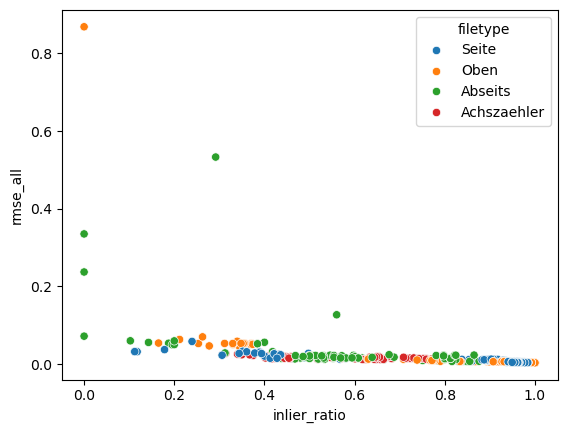

In [20]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="filetype")

<Axes: xlabel='inlier_ratio', ylabel='rmse_all'>

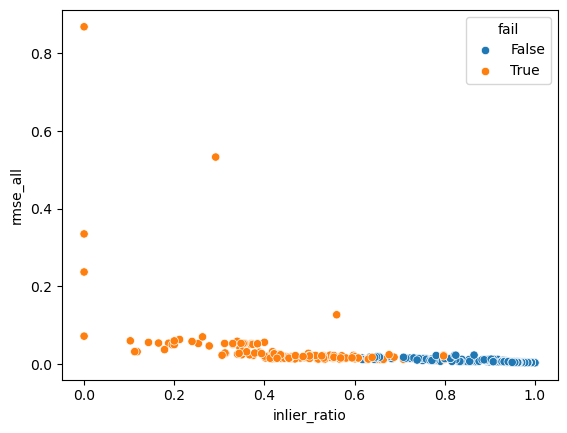

In [21]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="fail")

<Axes: xlabel='inlier_ratio', ylabel='rmse_all'>

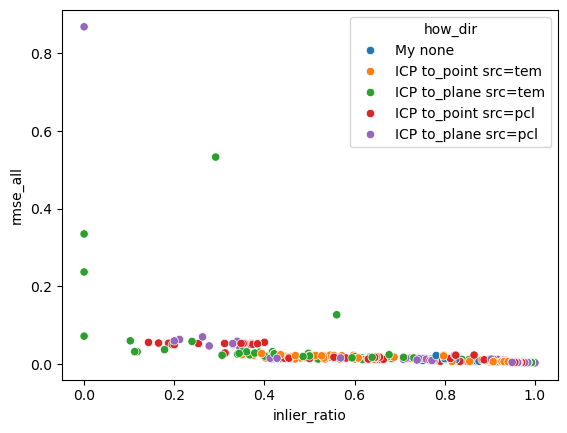

In [22]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="how_dir")

Zoom in auf den Cluster links unten mit den besonders guten 
- Alle Methoden ähnlich
- ICP: src=pcl etwas besser als src=tem
- My ganz gut
- nur Oben und Seite dabei, schwierige Situationen fehlen

(0.9, 1.0)

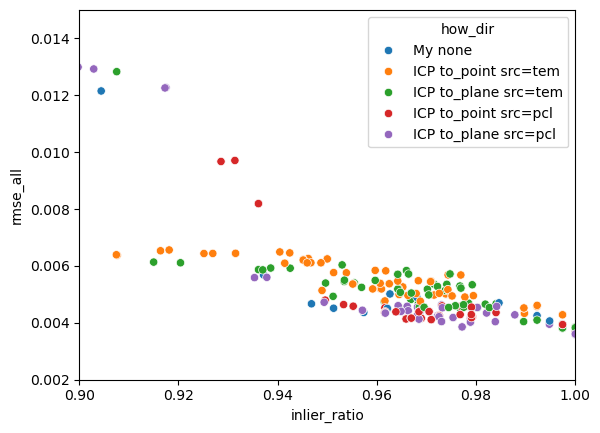

In [23]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="how_dir")
plt.ylim(0, 0.03)

# zoom in
plt.ylim(0.002, 0.015)
plt.xlim(0.9, 1)

(0.9, 1.0)

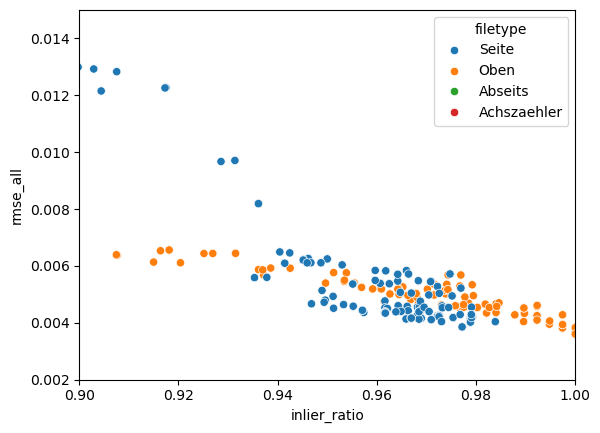

In [24]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="filetype")
plt.ylim(0, 0.03)

# zoom in
plt.ylim(0.002, 0.015)
plt.xlim(0.9, 1)

Größerer Ausschnitt
- inlier_ratio unter 0.6 kann als Fail angesehen werden, ziemlich viele davon
- My steht viel besser da als ICP

(0.3, 1.0)

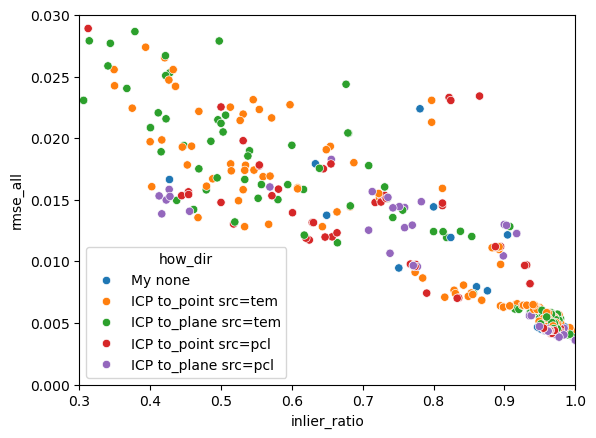

In [25]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="how_dir")
plt.ylim(0, 0.03)

# zoom in
#plt.ylim(0.002, 0.6)
plt.xlim(0.3, 1)

<Axes: xlabel='inlier_ratio', ylabel='rmse_all'>

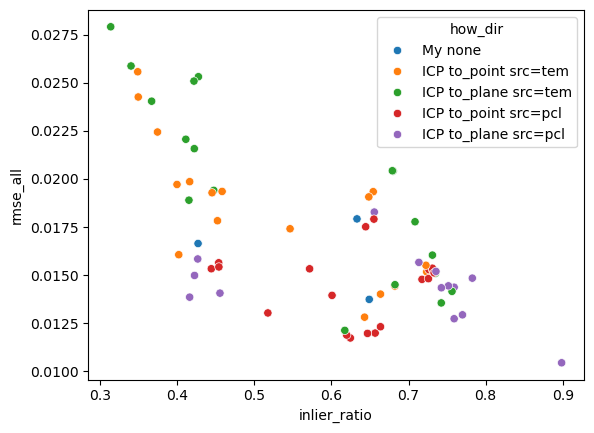

In [26]:
sns.scatterplot(data=df[df["filetype"] == "Achszaehler"], x="inlier_ratio", y="rmse_all", hue="how_dir")


(0.3, 1.0)

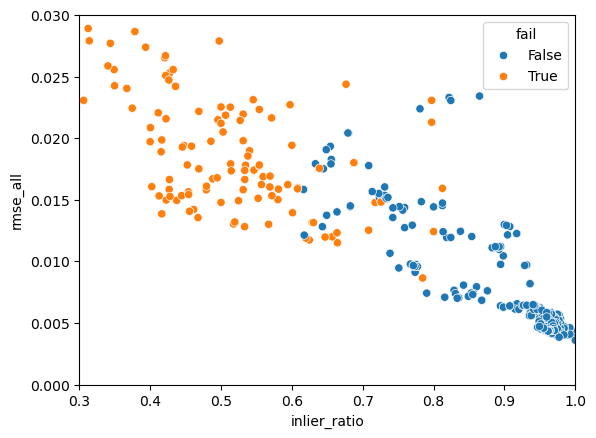

In [27]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="fail")
plt.ylim(0, 0.03)

# zoom in
#plt.ylim(0.002, 0.6)
plt.xlim(0.3, 1)

- Seite hat generell höheren RMSE, u.a. weil viele Punkte zwischen Kopf und Steg
- Achszähler: geringe inlier ratio, erhöhtes RMSE

(0.3, 1.0)

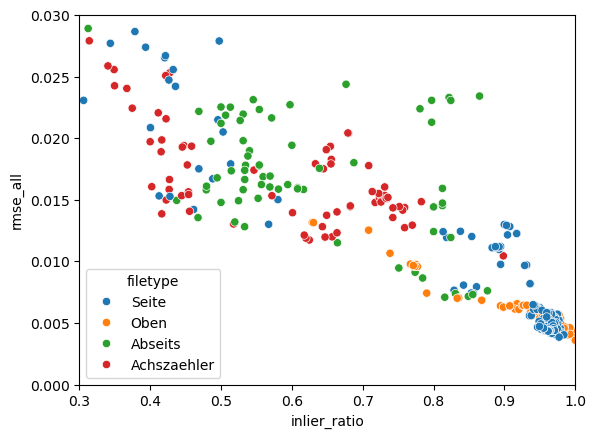

In [28]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="filetype")
plt.ylim(0, 0.03)

# zoom in
plt.xlim(0.3, 1)

(0.75, 1.0)

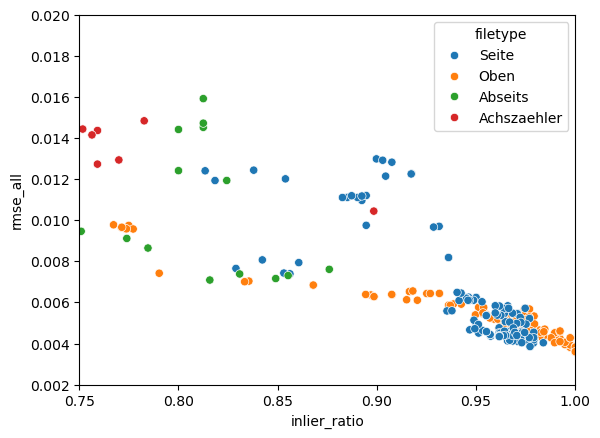

In [29]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="filetype")
plt.ylim(0, 0.03)

# zoom in
plt.ylim(0.002, 0.02)
plt.xlim(0.75, 1)

- ICP src=pcl  bei Erfolg geringster Fehler, allerdings unberechenbar

(0.75, 1.0)

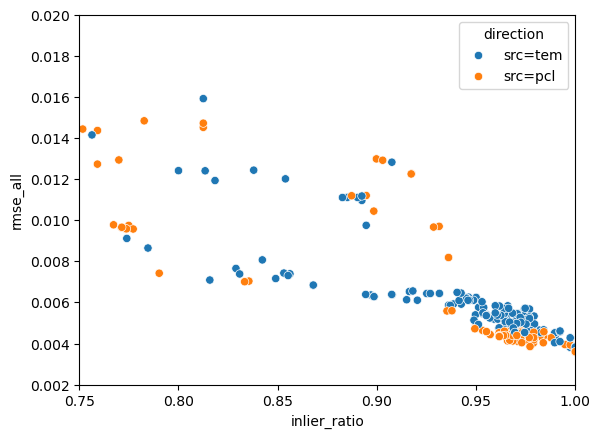

In [30]:
sns.scatterplot(data=df[df["how"]!="My"], x="inlier_ratio", y="rmse_all", hue="direction")
# sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="direction")

plt.ylim(0, 0.03)

# Optionally zoom in
plt.ylim(0.002, 0.02)
plt.xlim(0.75, 1)

(0.0, 0.03)

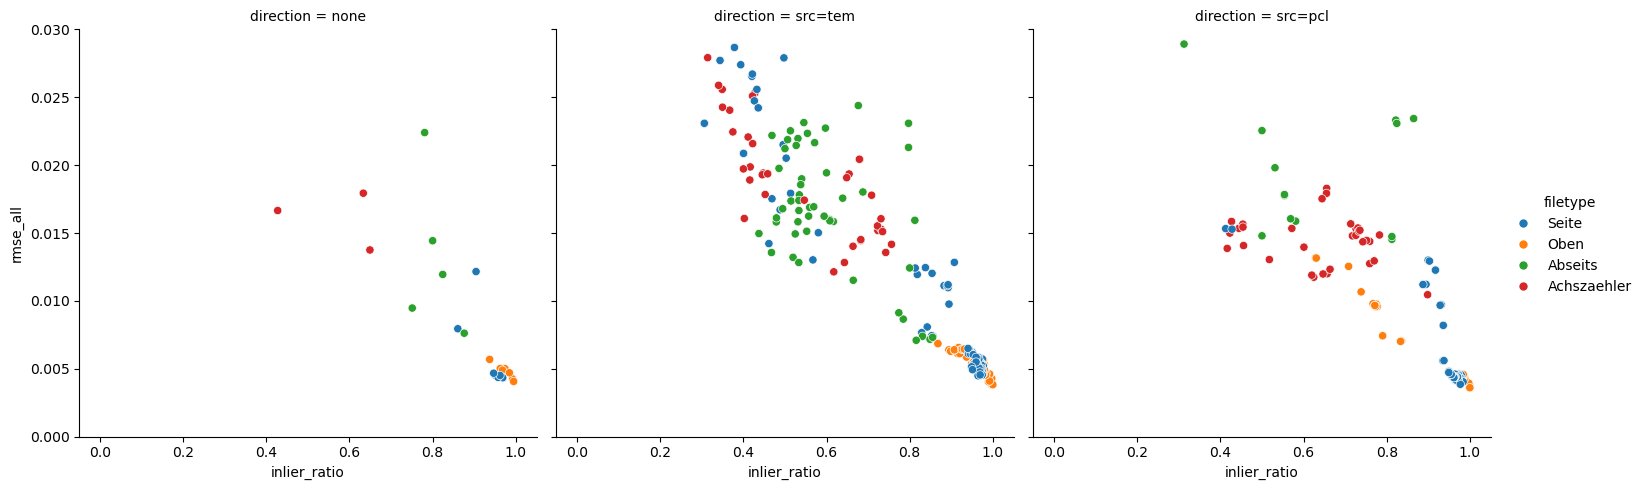

In [31]:
sns.relplot(data=df, x="inlier_ratio", y="rmse_all", hue="filetype", col="direction")
plt.ylim(0, 0.03)

# zoom in
#plt.ylim(0.002, 0.02)
#plt.xlim(0.2, 1)

# direction = none ist My

(0.0, 0.03)

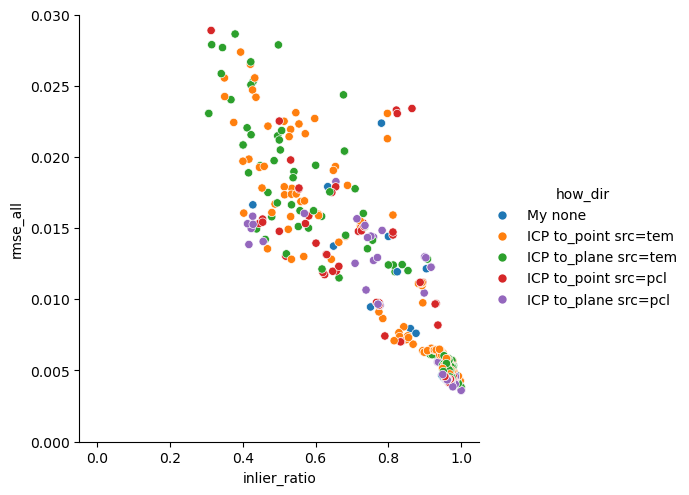

In [32]:
sns.relplot(data=df, x="inlier_ratio", y="rmse_all", hue="how_dir")
plt.ylim(0, 0.03)

- My und "ICP to point src=tem" im folgenden Plot eindeutig am besten
- Template 2 generell schlecher als Template 0 und 1; 0 evtl. klein wenig besser als 1

(0.0, 1.0)

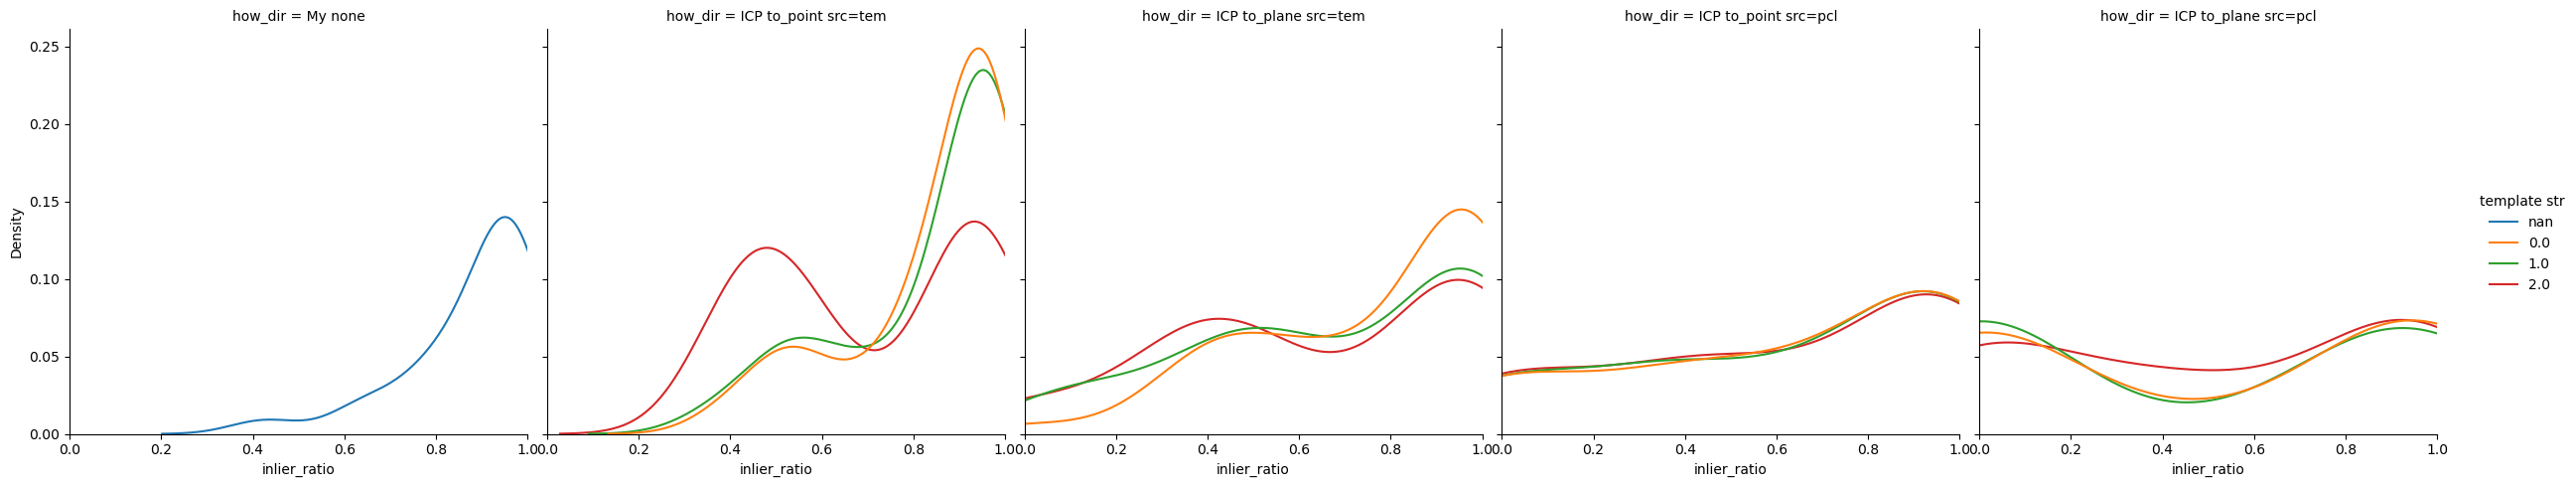

In [33]:
sns.displot(data=df, x="inlier_ratio",  col="how_dir", hue="template str", kind="kde")
plt.xlim(0, 1)

- auch hier My und "ICP to point src=tem" vorne
- "ICP to plane src=pcl" ist besonders gut, wenn es denn klappt
- Template 2 eindeutig schlecht

(0.0, 0.03)

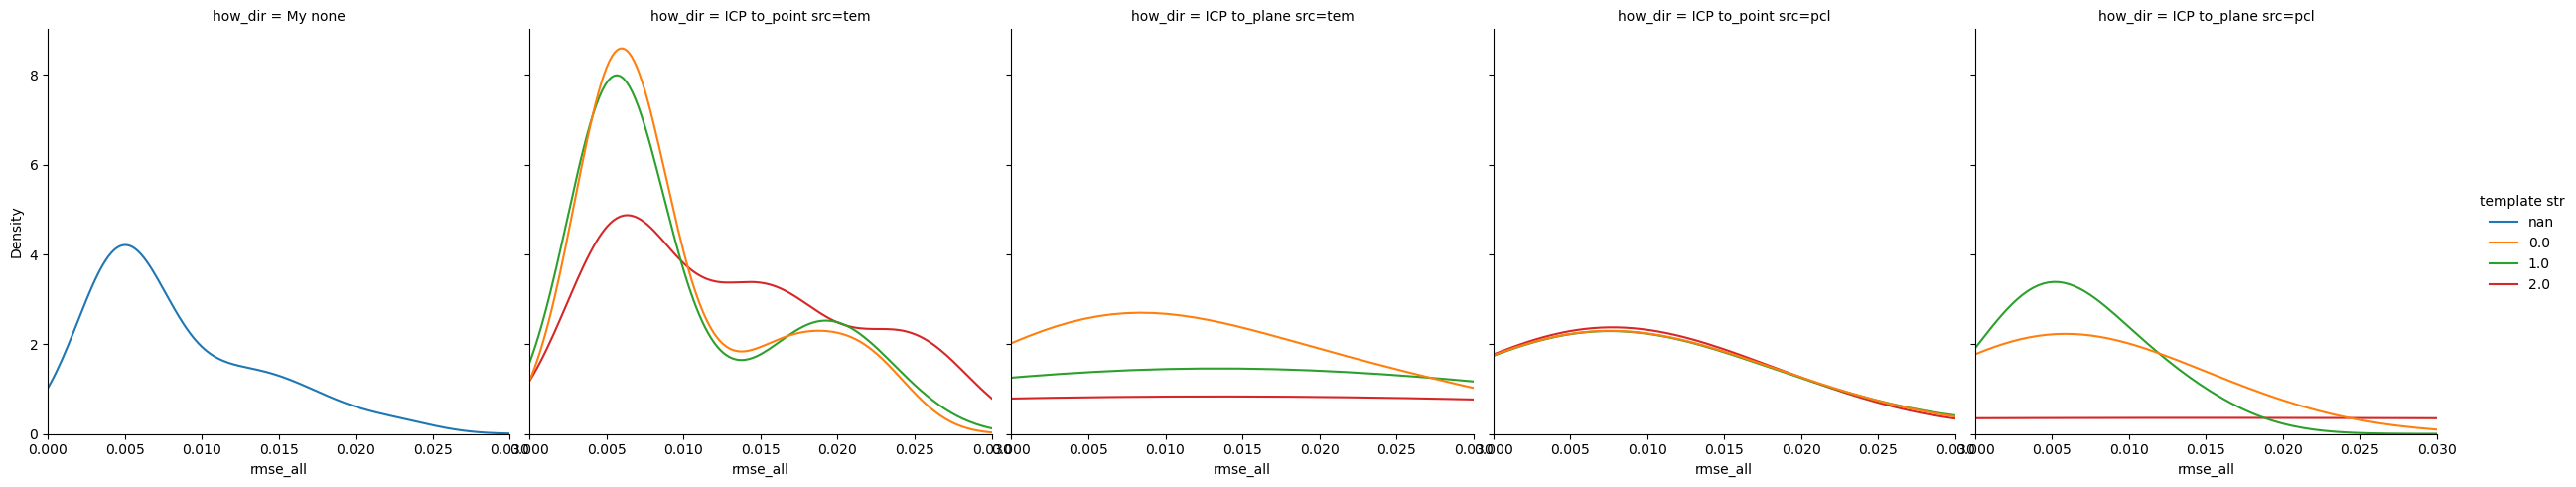

In [34]:
sns.displot(data=df, x="rmse_all",  col="how_dir", hue="template str", kind="kde")
plt.xlim(0, 0.03)

Nochmal die Templates im Vergleich

(0.0, 0.03)

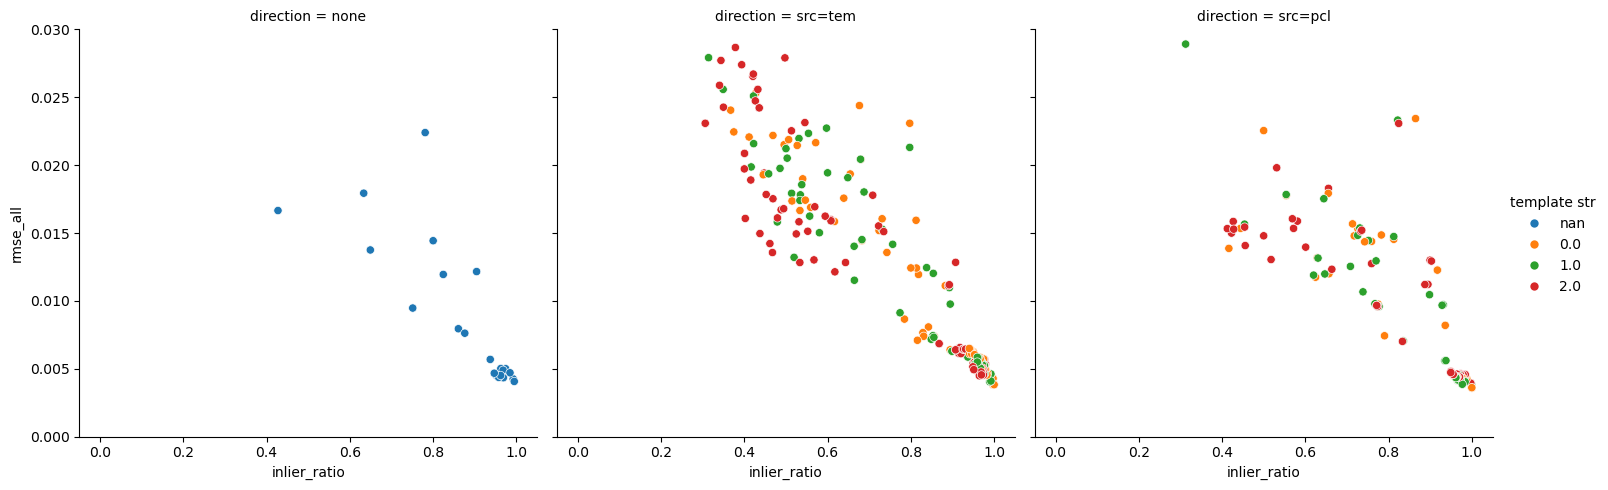

In [35]:
sns.relplot(data=df, x="inlier_ratio", y="rmse_all", hue="template str", col="direction")
plt.ylim(0, 0.03)

Bei template 0 scheint sich die Richtung am wenigsten, bei Template 2 am Meisten auszuwirken:

(0.0, 0.03)

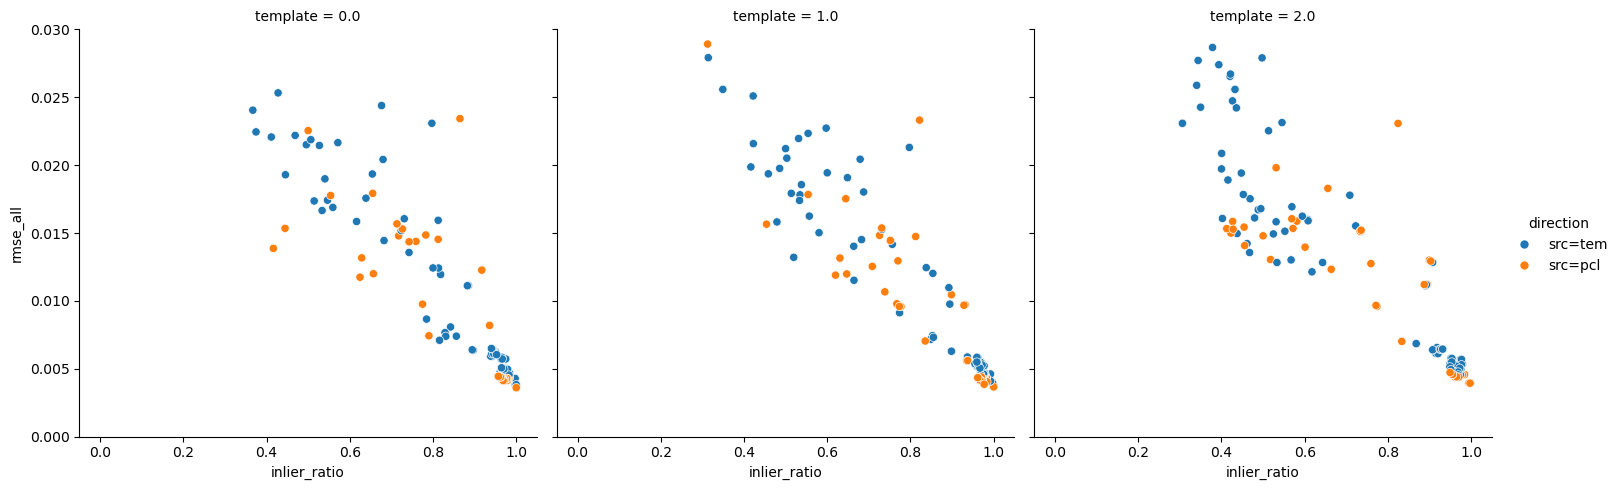

In [36]:
sns.relplot(data=df[df["how"]!= "My"], x="inlier_ratio", y="rmse_all", hue="direction", col="template")
plt.ylim(0, 0.03)


(0.0, 0.03)

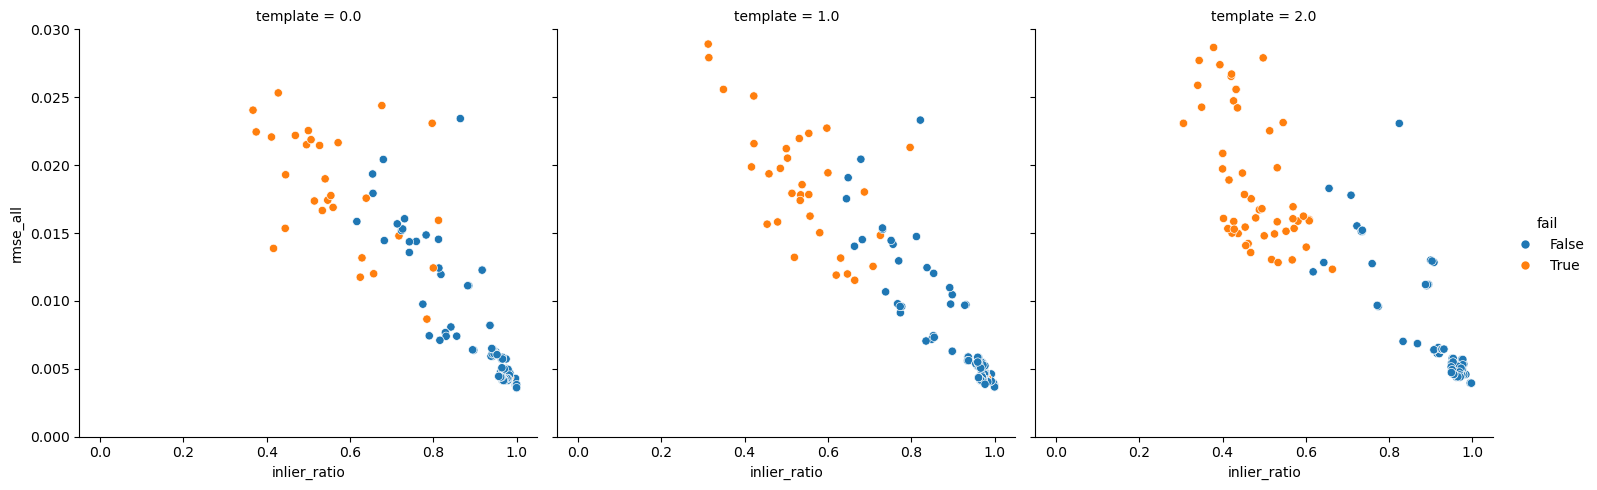

In [37]:
sns.relplot(data=df[df["how"]!= "My"], x="inlier_ratio", y="rmse_all", hue="fail", col="template")
plt.ylim(0, 0.03)

(0.0, 0.03)

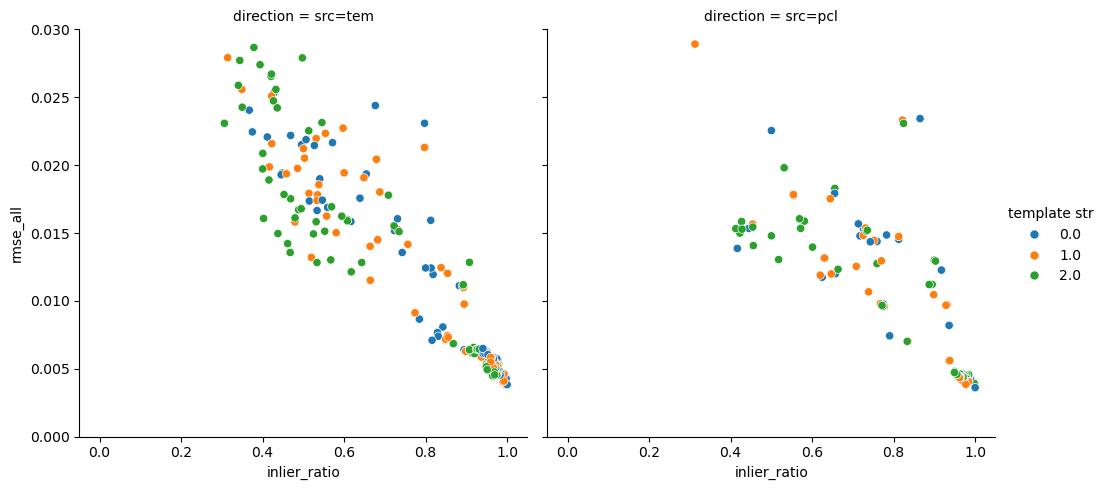

In [38]:
sns.relplot(data=df[df["how"]!= "My"], x="inlier_ratio", y="rmse_all", col="direction", hue="template str")
# sns.relplot(data=df, x="inlier_ratio", y="rmse_all", col="direction", hue="template str")

plt.ylim(0, 0.03)

(0.0, 0.03)

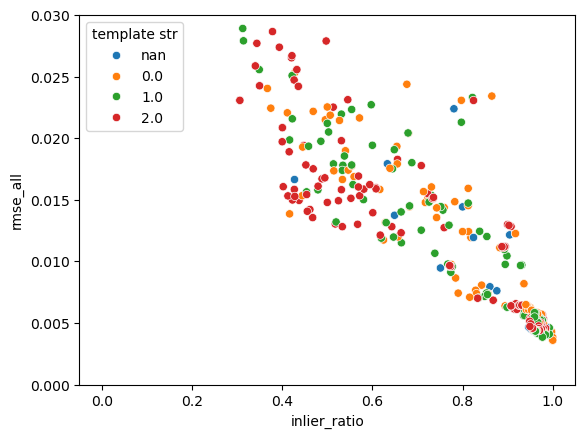

In [39]:
sns.scatterplot(data=df, x="inlier_ratio", y="rmse_all", hue="template str")
plt.ylim(0, 0.03)

## ICP RMSE

- ICP minimiert, was im df "ICP RMSE" ist. 
- dieser hängt stark von der anisotropen Stuktur der Scanlinien und von der Richtung (src/target) ab 
- Fitness (inlier ratio bei der ICP) hängt auch sehr stark von Richtung ab, 
- weil im einen Fall dichte Wolke gegen anisotrop sparse Wolke verglichen wird, im anderen Fall umgekehrt
- wenig aussagekräftig

(0.0, 0.03)

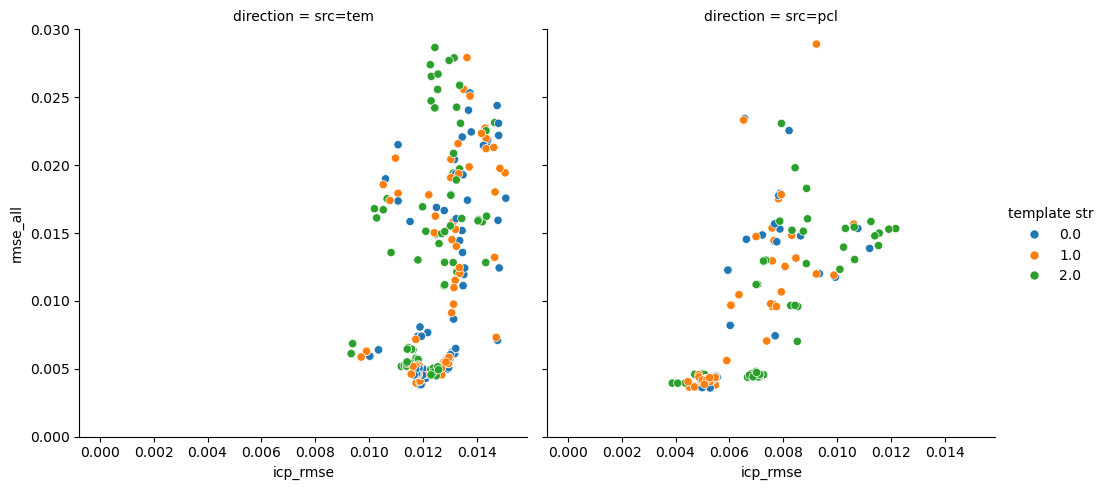

In [40]:
sns.relplot(data=df[df["how"]!= "My"], x="icp_rmse", y="rmse_all", col="direction", hue="template str")
plt.ylim(0, 0.03)

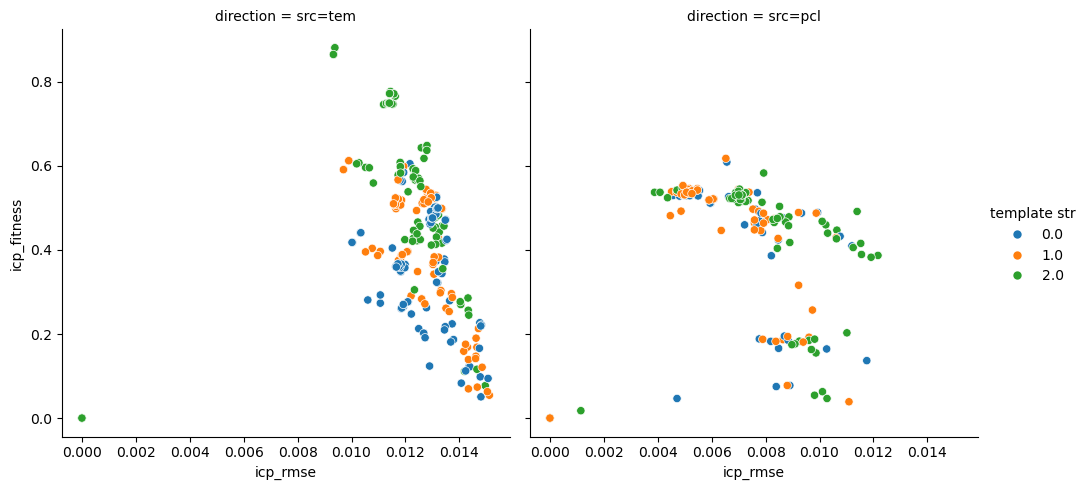

In [41]:
sns.relplot(data=df[df["how"]!= "My"], x="icp_rmse", y="icp_fitness", col="direction", hue="template str")


## Pivot RMSE
- Vergleich verschiedenere Methoden, mit jeweils gleichem Clusterpaar
- ICP: Nur Template 0

In [42]:
mask = (df["template"] == 0) | (df["template"].isna()) # Nur template 0 und Version "My"
rmse = df[mask].pivot(index=["file", "shift_z"], columns="how_dir", values="rmse_all").reset_index() 
rmse.head()

how_dir,file,shift_z,ICP to_plane src=pcl,ICP to_plane src=tem,ICP to_point src=pcl,ICP to_point src=tem,My none
0,Abseits1,0.00,NaN,0.021866,0.056310,0.021644,0.011940
1,Abseits1,0.03,NaN,0.012419,0.052870,0.007092,NaN
2,Abseits14Punkte,0.00,NaN,NaN,0.022533,0.022177,0.014424
3,Abseits14Punkte,0.03,NaN,0.017556,0.014527,0.015927,NaN
4,AbseitsAusreisser,0.00,NaN,0.032178,0.017750,0.021439,0.022386


In [43]:
rmse["shift_z"] = rmse["shift_z"].astype(str)

- ICP 
    - to_plane src=pcl: entweder top oder totaler fail
    - My ist tendenziell 2. Stelle 

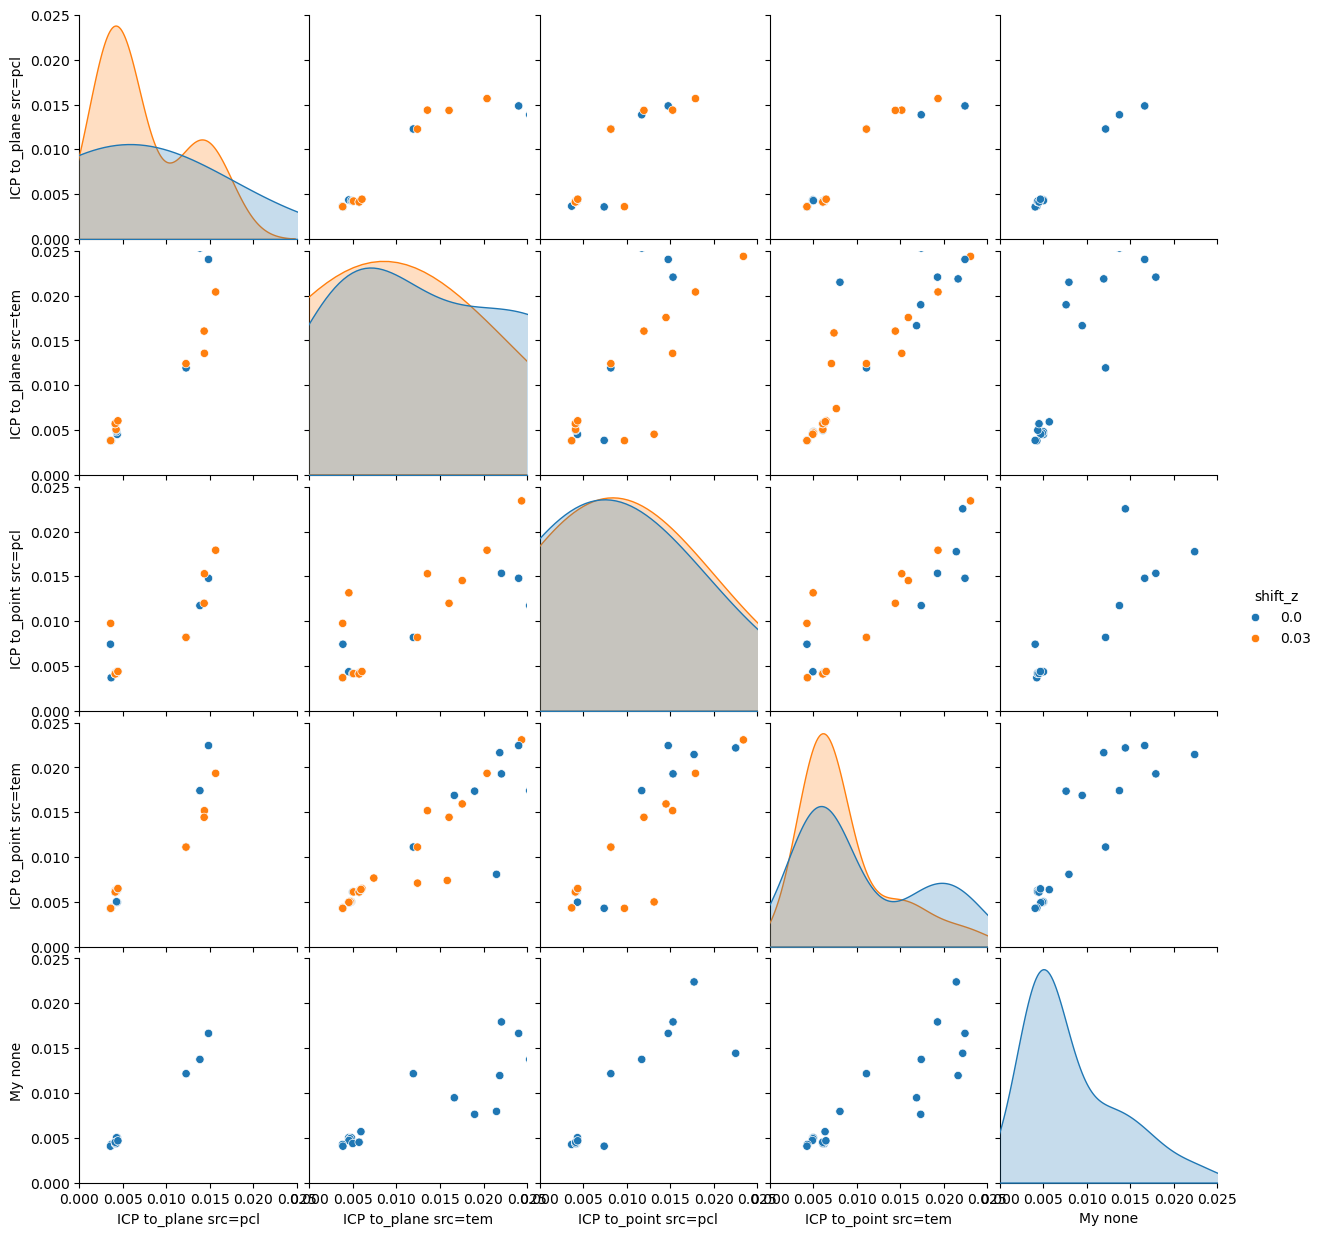

In [44]:
g = sns.pairplot(rmse, diag_kind="kde", hue="shift_z") 
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlim(0, 0.025)
        ax.set_ylim(0, 0.025)

## Pivot Inlier Ratio

In [45]:
inlier_rat = df[mask].pivot(index=["file", "shift_z"], columns="how_dir", values="inlier_ratio").reset_index() 
inlier_rat["shift_z"] = inlier_rat["shift_z"].astype(str)
inlier_rat.head()

how_dir,file,shift_z,ICP to_plane src=pcl,ICP to_plane src=tem,ICP to_point src=pcl,ICP to_point src=tem,My none
0,Abseits1,0.0,0.0,0.506494,0.400000,0.571429,0.824324
1,Abseits1,0.03,0.0,0.800000,0.384615,0.815789,NaN
2,Abseits14Punkte,0.0,0.0,0.000000,0.500000,0.468750,0.800000
3,Abseits14Punkte,0.03,0.0,0.638889,0.812500,0.812500,NaN
4,AbseitsAusreisser,0.0,0.0,0.417910,0.554054,0.527027,0.780822


- Bei ICP fällt auf, dass "shift_z" großen Unterschied macht
- My schneidet super ab, fast immer Top!

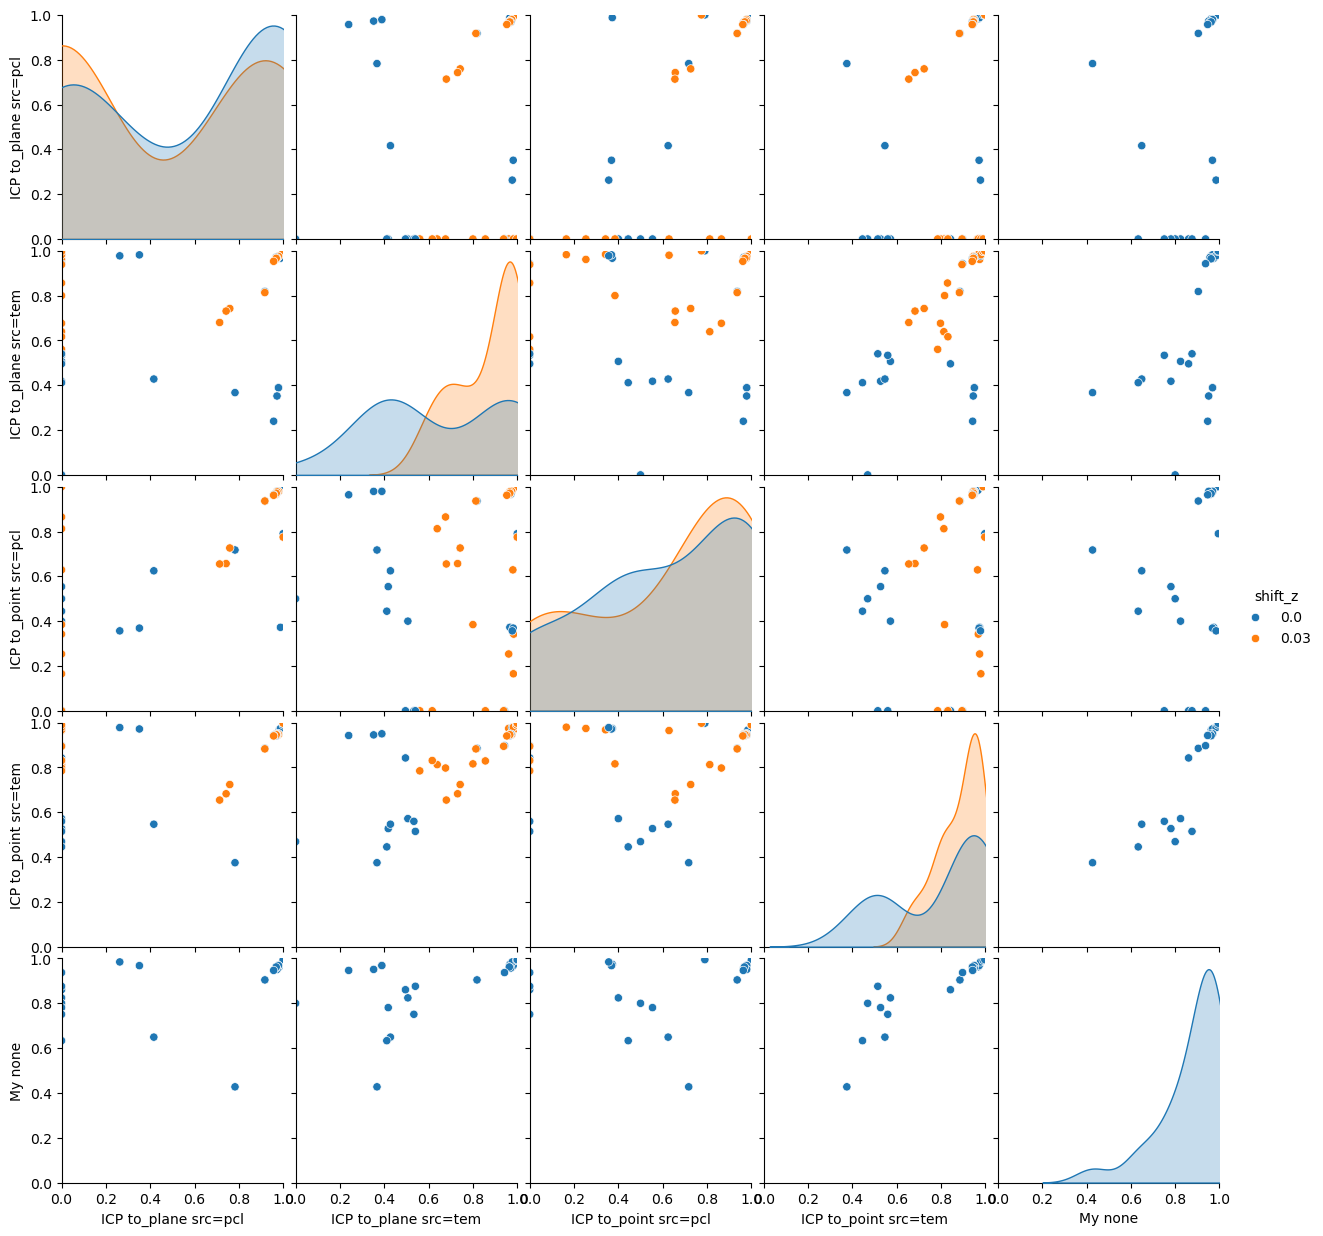

In [46]:
g = sns.pairplot(inlier_rat, diag_kind="kde", hue="shift_z") 
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

## Pivot Inlier RMSE
- ist nicht sehr aussagekräftig trotzdem ansehen
- alle liegen in sehr engem Bereich
- meines ist evtl. minimal schlechter (höheres max), aber fast gleich

In [47]:
mask = ((df["template"] == 0) | (df["template"].isna())) & ((df["shift_z"] == 0)) # Nur template 0 und Version "My"; ohne shift


inlier_rmse = df[mask].pivot(index=["file", "shift_z"], columns="how_dir", values="rmse_inliers").reset_index()
inlier_rmse["shift_z"] = inlier_rat["shift_z"].astype(str)
inlier_rmse.head()

how_dir,file,shift_z,ICP to_plane src=pcl,ICP to_plane src=tem,ICP to_point src=pcl,ICP to_point src=tem,My none
0,Abseits1,0.0,0.000000,0.005094,0.002440,0.006019,0.005242
1,Abseits14Punkte,0.03,0.000000,0.000000,0.006122,0.005784,0.005131
2,AbseitsAusreisser,0.0,0.000000,0.004696,0.005415,0.005459,0.005343
3,Achszaehler1,0.03,0.004653,0.006014,0.005524,0.006417,0.005774
4,Achszaehler2,0.0,0.006368,0.005697,0.005671,0.005854,0.005433


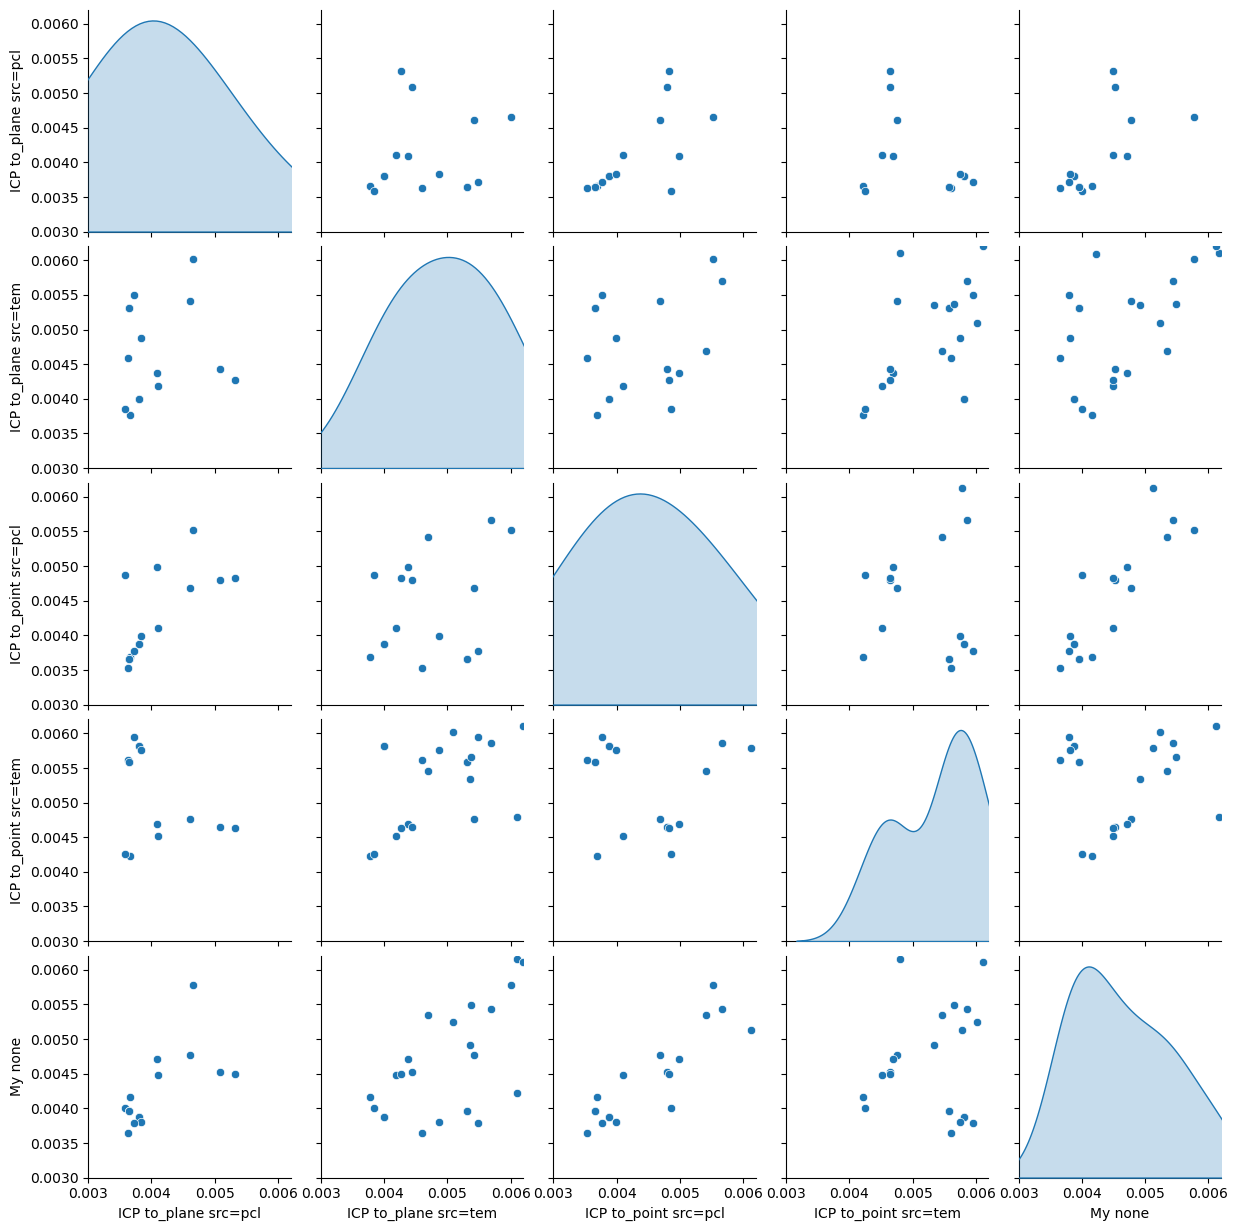

In [48]:
g = sns.pairplot(inlier_rmse, diag_kind="kde") 
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlim(0.003, 0.0062)
        ax.set_ylim(0.003, 0.0062)

In [49]:
df[df["fail"] == False].groupby("how_dir").aggregate({"rmse_inliers": stats}).dropna()

rmse_inliers                                        
                           median      mean       std       min       max
how_dir                                                                  
ICP to_plane src=pcl     0.003895  0.004068  0.000441  0.003461  0.005048
ICP to_plane src=tem     0.004833  0.004758  0.000551  0.003770  0.005819
ICP to_point src=pcl     0.003917  0.004130  0.000497  0.003521  0.005464
ICP to_point src=tem     0.004941  0.005063  0.000495  0.004212  0.005972
My none                  0.004493  0.004613  0.000750  0.003648  0.006161

## Speed

- Eher kein Zusammenhang mit der Punktzahl
- ICP: besonders lang endet als fail

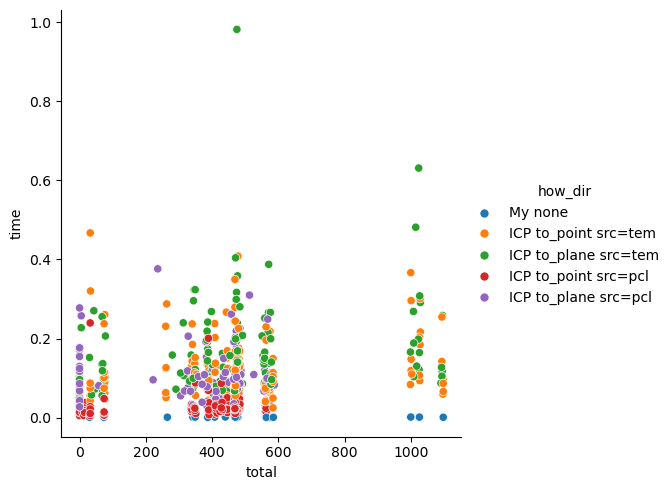

In [50]:
sns.relplot(data=df, x='total', y='time', hue='how_dir')

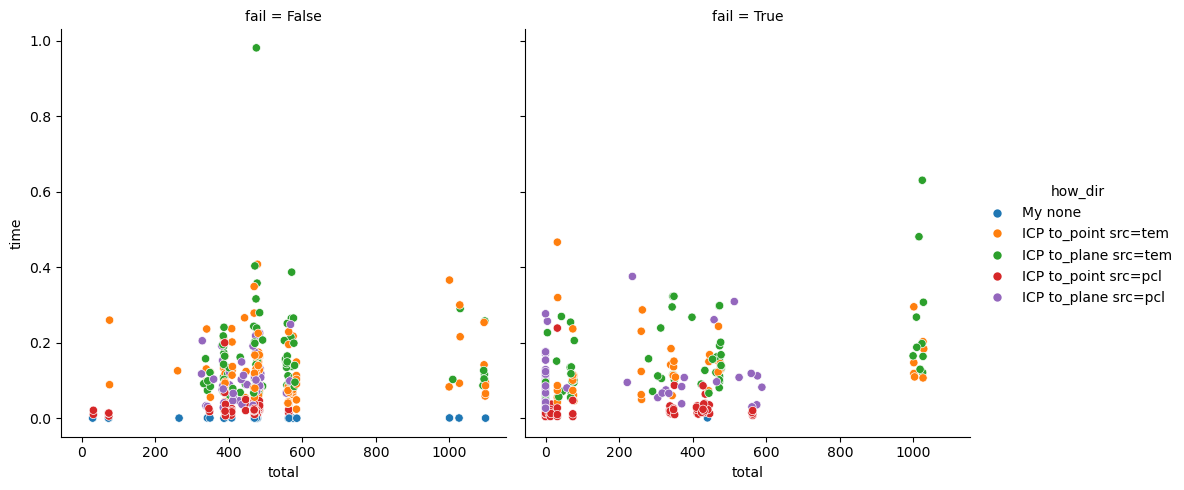

In [51]:
sns.relplot(data=df, x='total', y='time', hue='how_dir', col='fail')

- My eindeutig am besten
- ICP große Unterschiede
- to plane nicht unbedingt am besten!
    - konvergiert laut Literatur i.d.R. am schnellsten
    - man muss aber Normals berechnen, das wurde hier mitgemessen

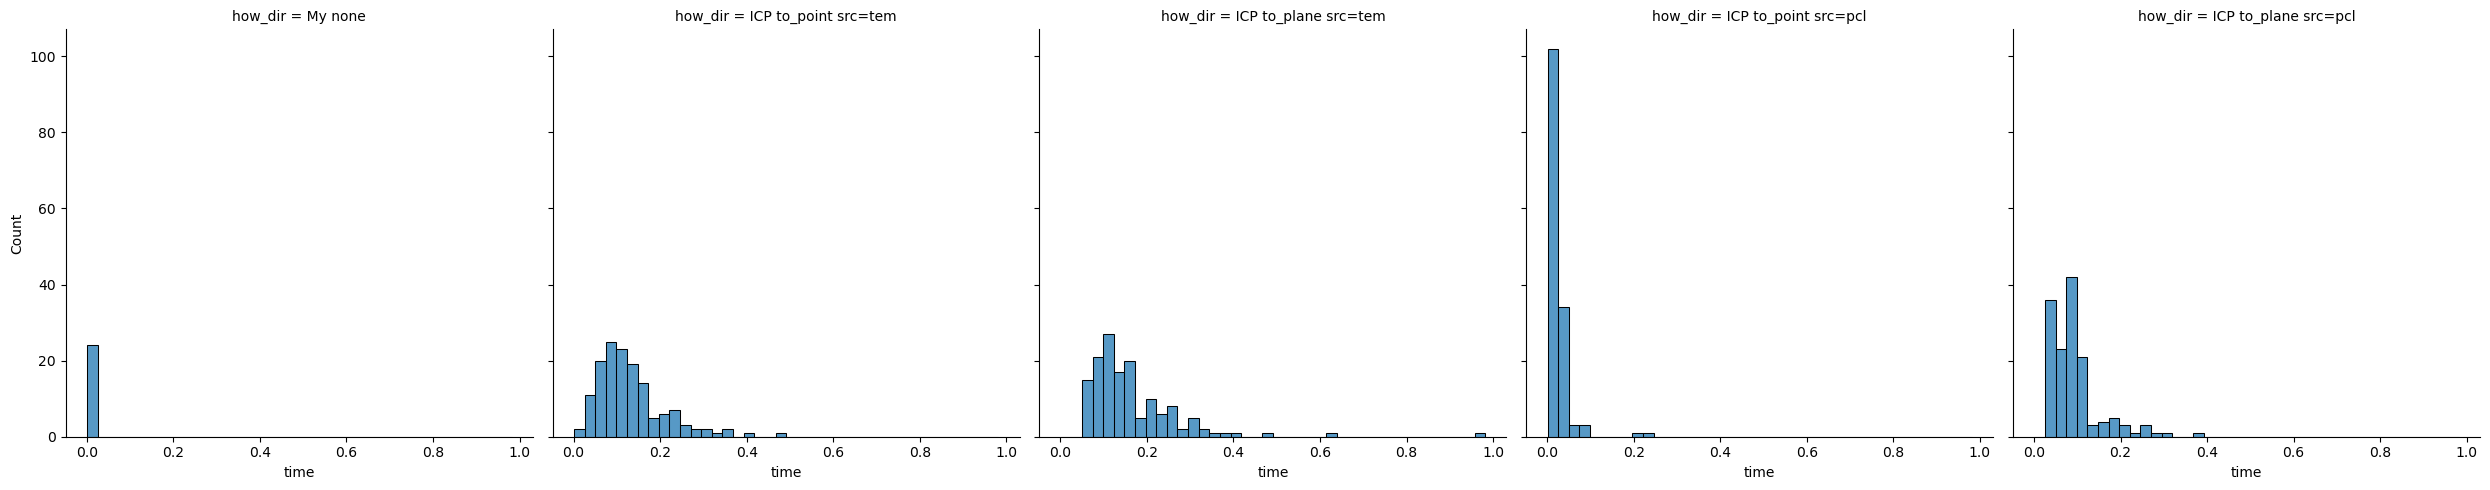

In [52]:
sns.displot(data=df, x='time', col='how_dir')

zoom

(0.0, 0.1)

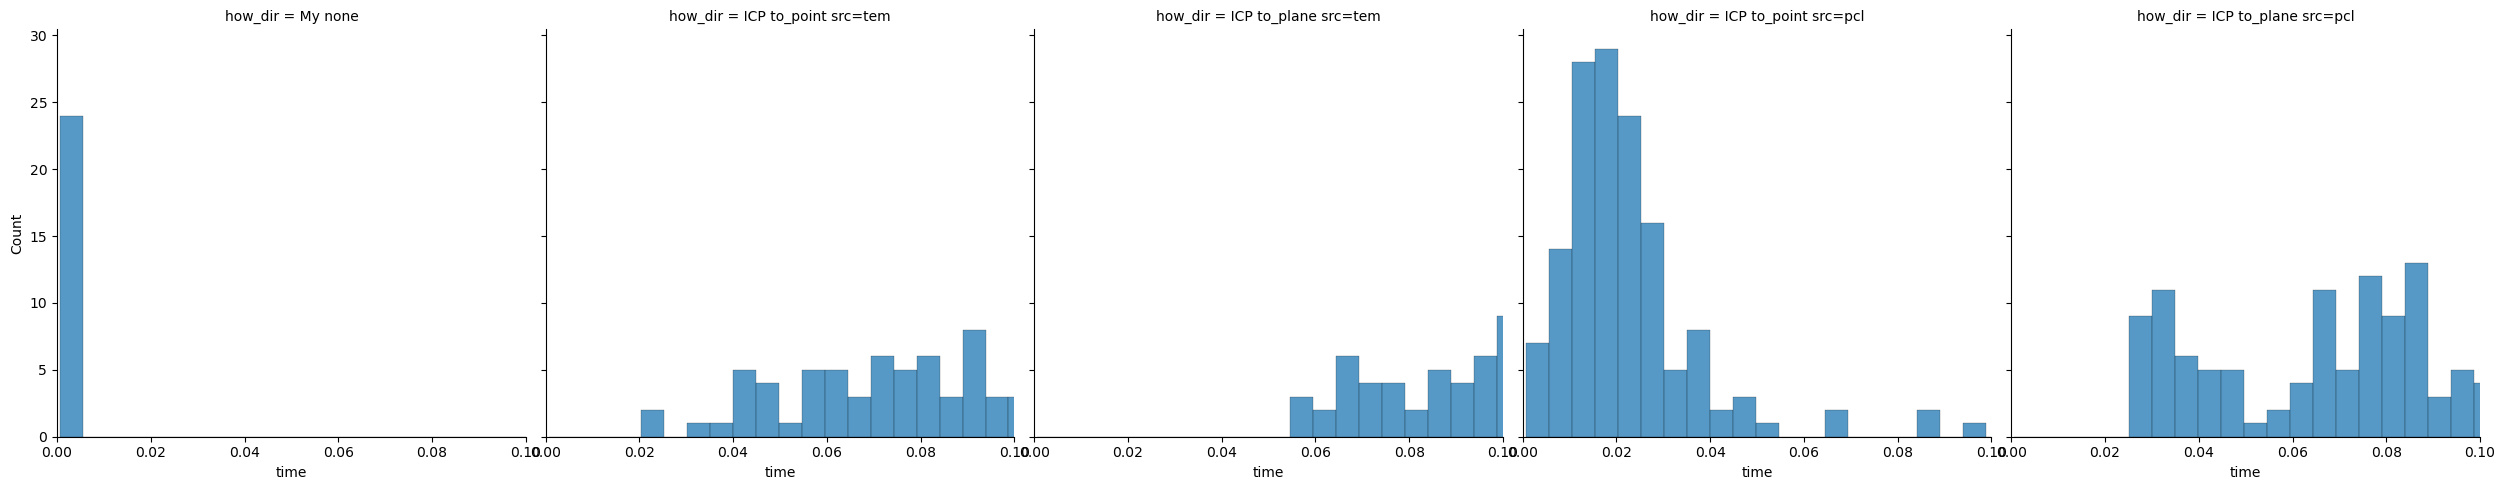

In [53]:
sns.displot(data=df, x='time', col='how_dir', bins=200)
plt.xlim(0, 0.1)

My ist 1 bis 2 Größenordnungen schneller!

In [54]:
df.groupby("how_dir").aggregate({"time": stats}).reset_index()

how_dir      time                                        
                           median      mean       std       min       max
0  ICP to_plane src=pcl  0.080251  0.091463  0.059764  0.027119  0.376200
1  ICP to_plane src=tem  0.136571  0.165200  0.112401  0.055720  0.981731
2  ICP to_point src=pcl  0.019630  0.025071  0.027693  0.004897  0.239407
3  ICP to_point src=tem  0.114202  0.131826  0.078575  0.020455  0.467012
4               My none  0.001003  0.001146  0.000664  0.000654  0.004009

Relativ ähnliches Bild wenn man nur nicht fail anschaut

In [55]:
df[df["fail"]== False].groupby("how_dir").aggregate({"time": stats}).reset_index()

how_dir      time                                        
                           median      mean       std       min       max
0  ICP to_plane src=pcl  0.084490  0.092318  0.052415  0.028961  0.248982
1  ICP to_plane src=tem  0.137130  0.163051  0.119465  0.058566  0.981731
2  ICP to_point src=pcl  0.020501  0.025987  0.025160  0.006328  0.200456
3  ICP to_point src=tem  0.106891  0.127596  0.076211  0.020455  0.408477
4               My none  0.000984  0.001128  0.000673  0.000654  0.004009

## Max corr
- Idee: correlation in xy oder yz Richtung (in lokalen transformierten Koordinaten) bedeutet, dass die Transformation schlecht war und die Projektion schief ist
    - max corr > 0.5 ist eindeutig zu schief
    - etwas darunter kann "besser geht es eben nicht" sein
    - Richtig gut ist <= 0.1
    - Wurde berechnet, weil "My" bei Achszählern oft schief
    - Hier wird klar, dass ICP deutlich schlechter ist
- NICHT BRAUCHBAR: Nach ipynb 40 kann die Korrelation sehr hoch sein obwohl nur kleiner Winkel, der keinen Einfluss hat!

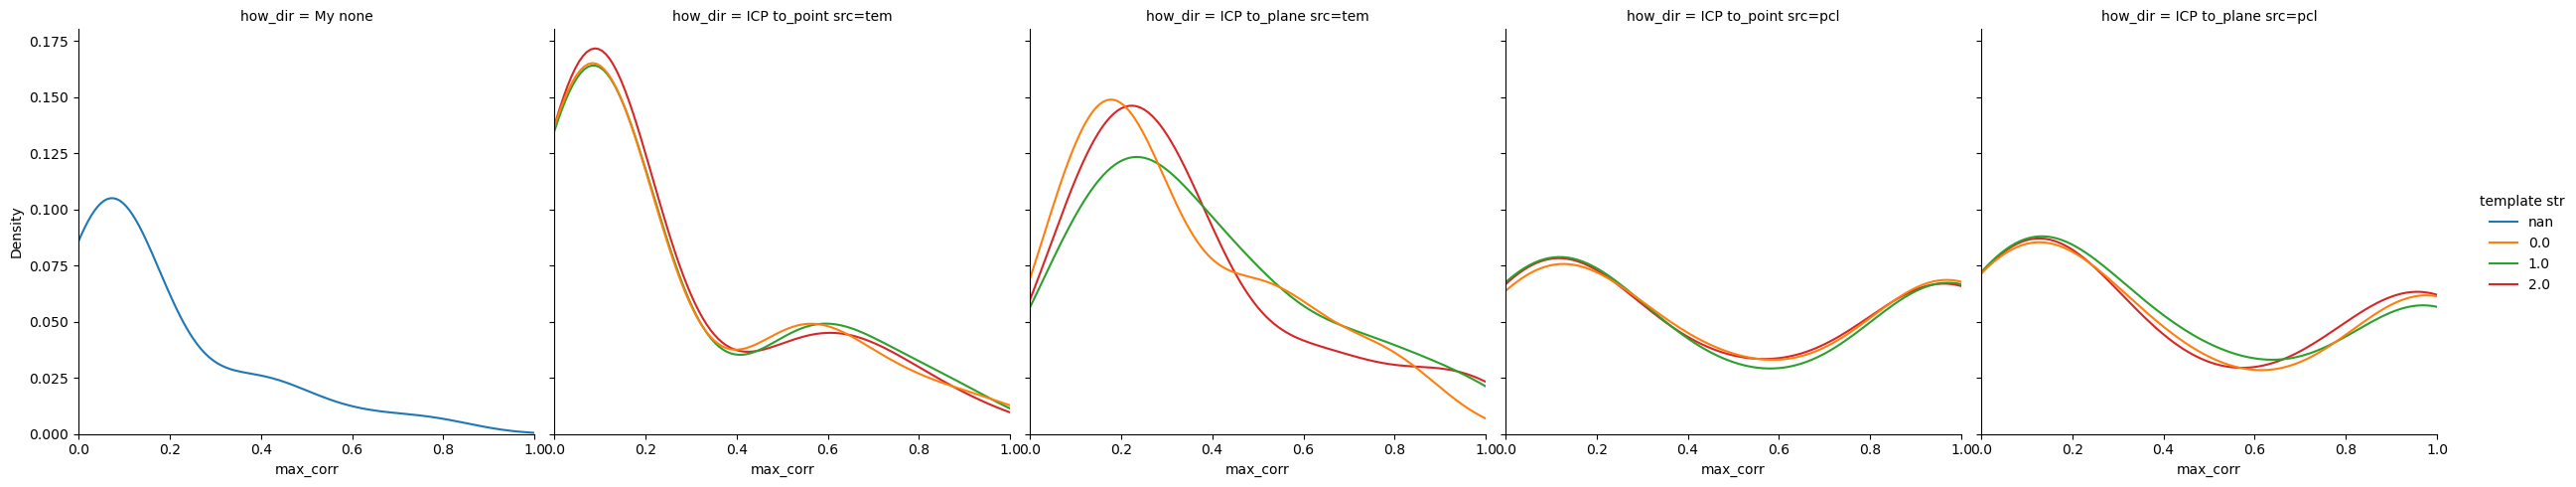

In [56]:
g = sns.displot(data=df, x="max_corr", col="how_dir", hue="template str", kind="kde")
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlim(0, 1)
        

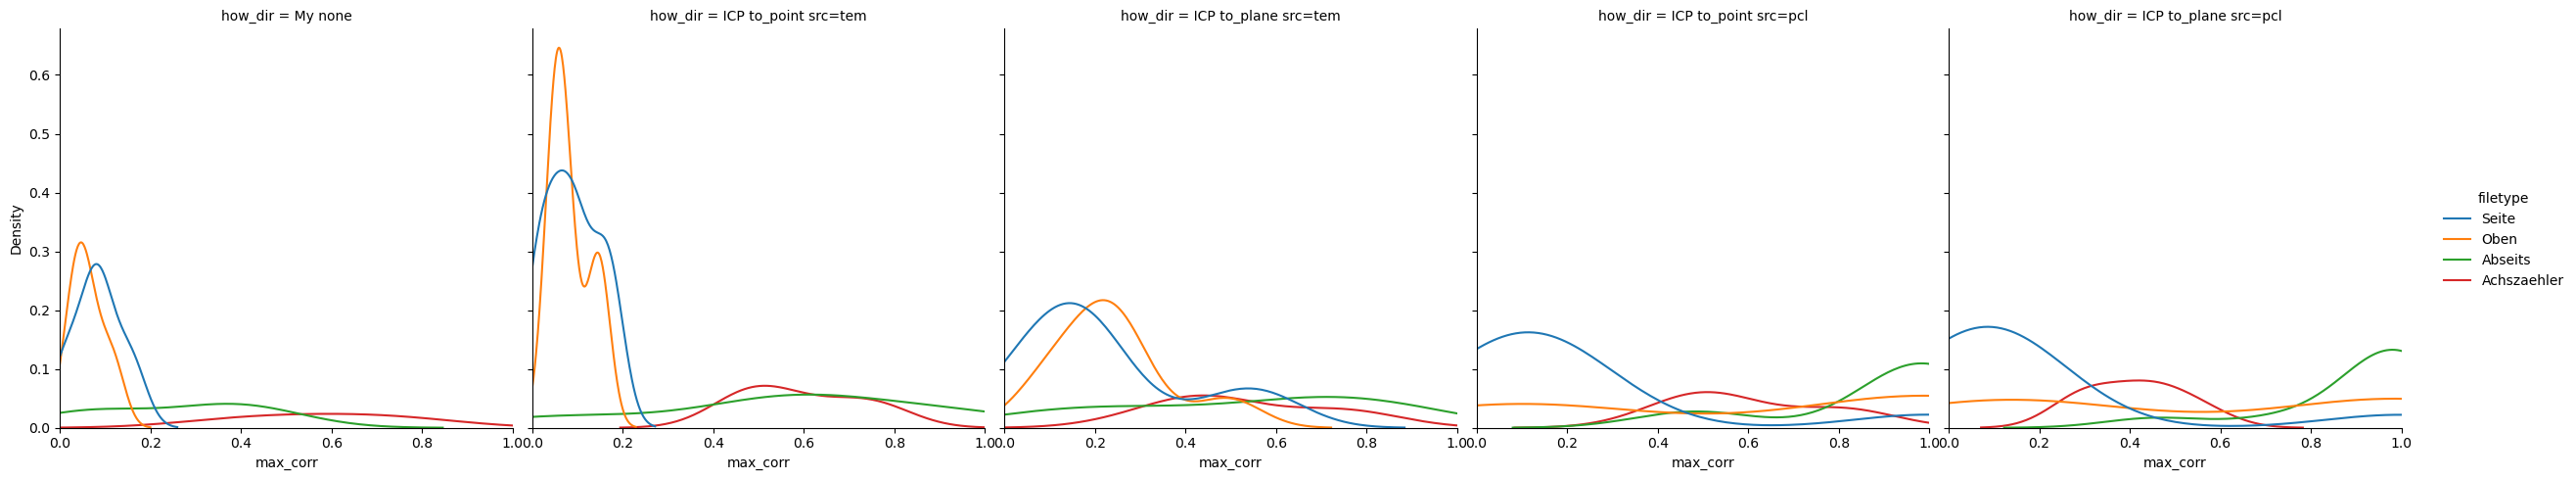

In [57]:
mask = ((df["template"] == 0) | (df["template"].isna())) # # Nur template 0 und Version "My"
g = sns.displot(data=df[mask], x="max_corr", col="how_dir", hue="filetype", kind="kde")
for ax in g.axes.flatten():
    if ax is not None:
        ax.set_xlim(0, 1)

In [58]:
df.groupby("how_dir").aggregate({"max_corr": stats}).reset_index()

how_dir  max_corr                                        
                           median      mean       std       min       max
0  ICP to_plane src=pcl  0.318339  0.471841  0.400165  0.034903  0.998101
1  ICP to_plane src=tem  0.275557  0.355214  0.254391  0.027813  0.997127
2  ICP to_point src=pcl  0.467671  0.509416  0.410062  0.017969  0.998101
3  ICP to_point src=tem  0.106383  0.250464  0.270316  0.008923  0.964282
4               My none  0.086684  0.175830  0.200713  0.010504  0.764932

In [59]:
df.columns

Index(['file', 'template', 'cluster_id', 'how', 'direction', 'shift_z',
       'total', 'inliers', 'inlier_ratio', 'rmse_inliers', 'rmse_all',
       'max_z_diff', 'corr_xy', 'corr_xy_upper', 'corr_yz', 'max_corr',
       'icp_rmse', 'icp_fitness', 'side_a', 'side_b', 'not_same_side', 'time',
       'distance', 'how_dir', 'template str', 'filetype', 'fail'],
      dtype='object')

- Während es bei My nur die xy-Richtung betrifft, ist es bei ICP auch die zy-Richtung
- Achszähler und Abseits immer problematisch
- bei ICP z.T. aber auch einfache Situationen!

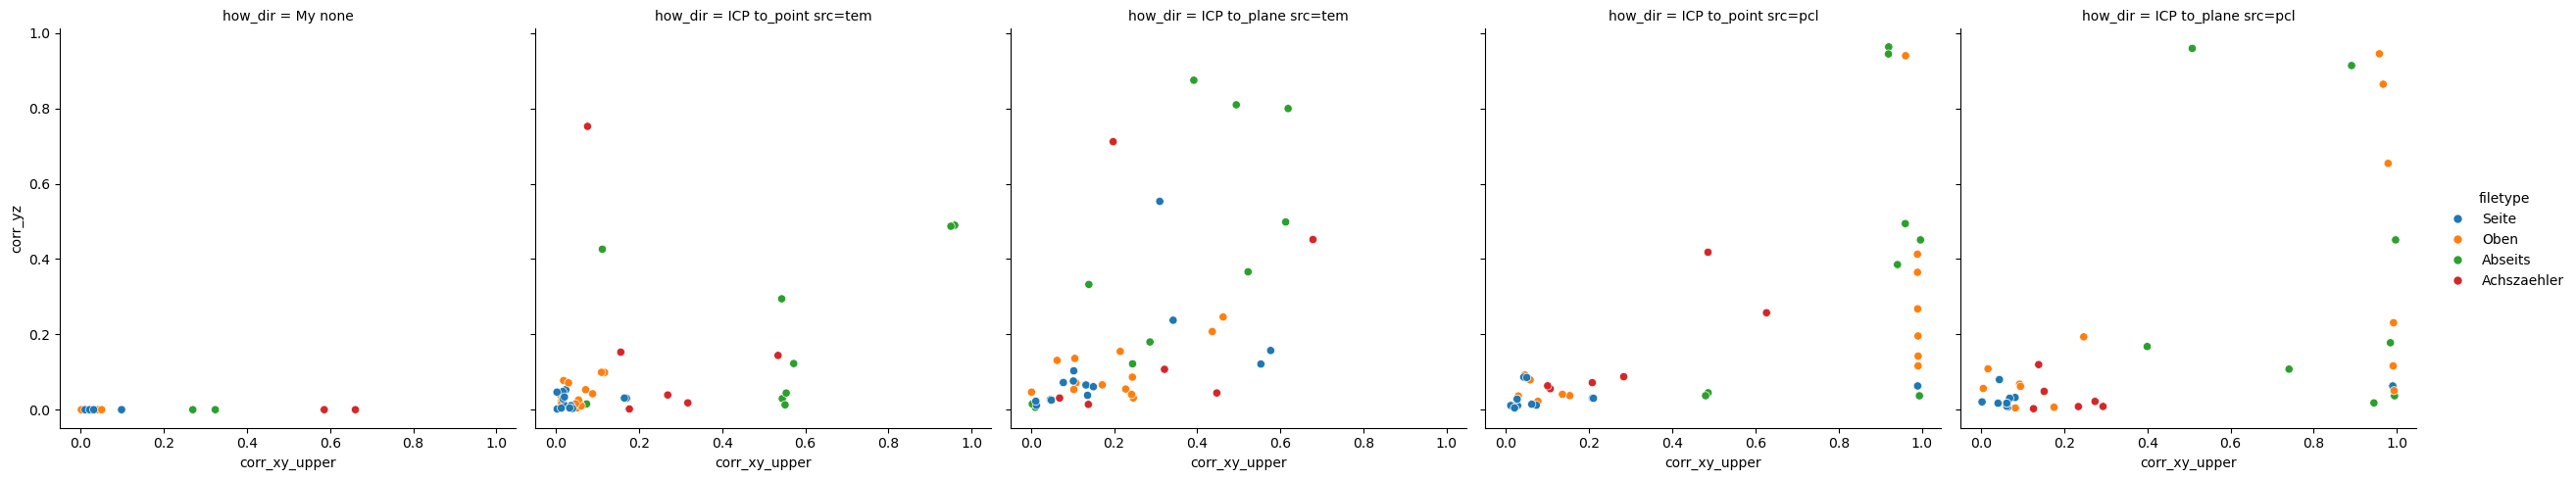

In [60]:
g = sns.relplot(data=df[mask], x="corr_xy_upper", y="corr_yz", col="how_dir", hue="filetype")

## Distance

In [61]:
df["distance"].dropna().describe()

count    288.000000
mean       0.102099
std        0.834378
min        0.000145
25%        0.005173
50%        0.027114
75%        0.052014
max       14.057461
Name: distance, dtype: float64

In [62]:
df[df["fail"] == False]["distance"].dropna().describe()

count    181.000000
mean       0.016180
std        0.019116
min        0.000145
25%        0.003615
50%        0.006095
75%        0.027092
max        0.088454
Name: distance, dtype: float64